In [21]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import pyrealsense2 as rs
from matplotlib.colors import ListedColormap
from range_image_to_point_cloud import RangeImagePointCloud
from freespace_plotter import FreespacePlotter, ViewEnum
import os

filenumber = 1
joint_angles_degrees = [180.00,
                        -50.599,
                        -128.270,
                        0.937,
                        -12.814,
                        0.616]

if not os.path.isdir(f"../data/frame{filenumber}"):
    os.mkdir(f"../data/frame{filenumber}")

jointfile = f"../data/frame{filenumber}/joints.txt"
depthfile = f"../data/frame{filenumber}/depth.txt"
imagefile = f"../data/frame{filenumber}/color.png"

capture = False
write_joints = False

In [22]:
if capture:
    pipeline = rs.pipeline()
    pipeline.start()
    frames = pipeline.wait_for_frames()
    pipeline.stop()

    depth_frame = frames.get_depth_frame()
    color_frame = frames.get_color_frame()

    # Convert images to numpy arrays
    depth_image = np.asanyarray(depth_frame.get_data())
    color_image = np.asanyarray(color_frame.get_data())

    np.savetxt(depthfile, depth_image)

    image = Image.fromarray(color_image)
    image.save(imagefile)

    print(depth_image.shape)
    print(color_image.shape)

if write_joints:
    np.savetxt(jointfile, np.array(joint_angles_degrees) * np.pi/180)

In [23]:
threshold = 2000

image = np.array(Image.open(imagefile))
depth = np.loadtxt(depthfile)
# depth[depth > threshold] = 0

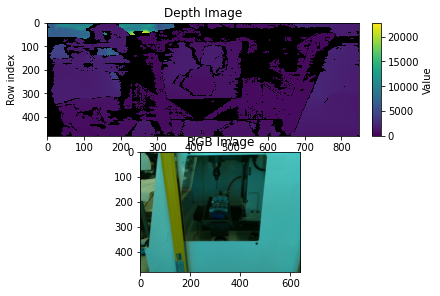

In [24]:
# Create a custom colormap
viridis_cmap = plt.cm.viridis  # Use the existing viridis colormap
colors = viridis_cmap(np.linspace(0, 1, viridis_cmap.N))  # Get the colors of viridis

# Modify the first color (index 0) to black for zero values
colors[0] = [0, 0, 0, 1]  # RGBA for black (0, 0, 0, 1)

# Create the custom colormap
viridis_with_0_black = ListedColormap(colors)

plt.figure(constrained_layout=True)

plt.subplot(2, 1, 1)

plt.pcolormesh(depth, cmap=viridis_with_0_black, shading='auto')

# Add a color bar to show the scale of values
plt.colorbar(label='Value')

# Label the axes
plt.xlabel('Column index')
plt.ylabel('Row index')
plt.title("Depth Image")

plt.gca().invert_yaxis()

plt.subplot(2, 1, 2)
plt.imshow(image)
plt.title("RGB Image")

# Show the plot
plt.show()

In [25]:
# Min range is about 17 cm
print(depth[depth.shape[0]//2, depth.shape[1]//2]) # it is in millimeters
print(depth[10, depth.shape[1] - 10])

917.0
1635.0


In [27]:
from offline_camera_mapper import CameraMapper
config_file = "../config/map_config.json"
cm = CameraMapper(config_file)
for filenumber in range(1, 2):
    cm.process_snapshot(f"../data/frame{filenumber}")

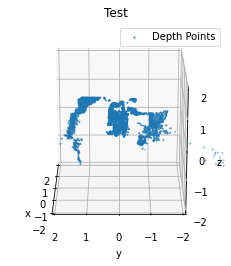

In [28]:
plotter = FreespacePlotter(ViewEnum.CUSTOM, "Test", [-2, 2], [-2, 2], [-2, 2], interactive=False, elev=20, azim=-180)

plotter.add_points(cm.points, "Depth Points")
plotter.update()

plt.show()